# Desain Model AI

### **Deskripsi Arsitektur Model Neural Network**

1. **Input Layer**:  
   - Ukuran input layer menyesuaikan dengan jumlah fitur pada dataset latih.
   - Layer ini menerima data yang sudah melalui preprocessing.

2. **Hidden Layer**:  
   - **Jumlah Hidden Layer**: 1.  
   - **Jumlah Neuron**: 96 neuron.  
   - **Fungsi Aktivasi**: ReLU (Rectified Linear Unit).  
   - **Dropout**: Dropout layer dengan tingkat dropout sebesar 20% diterapkan setelah hidden layer untuk mencegah overfitting.

3. **Output Layer**:  
   - **Jumlah Neuron**: 1 neuron (karena ini adalah tugas regresi).  
   - **Fungsi Aktivasi**: Linear (cocok untuk memprediksi nilai kontinu seperti `matching_score`).

4. **Hyperparameter Model**:  
   - **Loss Function**: Mean Squared Error (MSE).  
     - MSE dipilih karena tugas ini merupakan masalah regresi, di mana kita ingin meminimalkan rata-rata kuadrat dari kesalahan prediksi.
   - **Optimizer**: Adam Optimizer.  
     - **Learning Rate**: 0.0009686835179818646 (hasil tuning hyperparameter terbaik).  
   - **Metrics**: Mean Absolute Error (MAE) digunakan sebagai metrik evaluasi tambahan untuk memantau performa model selama pelatihan.

5. **Pengaturan Pelatihan**:  
   - **Batch Size**: 32 (mini-batch stochastic gradient descent).  
   - **Epochs**: Maksimum 50 epoch.  
   - **Callback**: Early Stopping diterapkan dengan konfigurasi:  
     - **Patience**: 5 (pelatihan dihentikan lebih awal jika validasi loss tidak membaik selama 5 epoch berturut-turut).  
     - **Restore Best Weights**: True (mengembalikan bobot model ke kondisi terbaik saat validasi loss terendah).  

6. **Evaluasi dan Penyimpanan**:  
   - Model dievaluasi menggunakan dataset test untuk menghitung `Test Loss` dan `Test MAE`.
   - Model disimpan dalam format Keras dengan nama `model_safefood_best.keras` di direktori `../models`.

7. **Visualisasi Hasil Pelatihan**:  
   - **Training vs Validation Loss**: Grafik ditampilkan untuk memantau tren loss selama pelatihan.
   - **Training vs Validation MAE**: Grafik ditampilkan untuk memantau tren MAE selama pelatihan.

---

### **Penjelasan Singkat**
Model ini dirancang untuk memprediksi nilai **matching_score** berdasarkan atribut donor dan penerima makanan. Dengan arsitektur sederhana (1 hidden layer dengan 96 neuron), model ini menggabungkan dropout untuk regularisasi dan menggunakan optimizer Adam dengan learning rate yang telah dituning.

Desain ini bertujuan untuk memastikan performa yang stabil sambil mencegah overfitting. Model dievaluasi secara menyeluruh menggunakan training, validation, dan test set.

Import Library yang dibutuhkan :

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

print("Library berhasil diimport")

Library berhasil diimport


Muat dataset yang diperlukan :

In [2]:
# Membaca dataset
train_data = pd.read_csv('../data/processed/training_set.csv')
val_data = pd.read_csv('../data/processed/validation_set.csv')
test_data = pd.read_csv('../data/processed/test_set.csv')

# Menghapus kolom yang tidak diperlukan
x_train = train_data.drop(columns=['id_penyumbang', 'id_penerima', 'matching_score'])
y_train = train_data['matching_score']

x_val = val_data.drop(columns=['id_penyumbang', 'id_penerima', 'matching_score'])
y_val = val_data['matching_score']

x_test = test_data.drop(columns=['id_penyumbang', 'id_penerima', 'matching_score'])
y_test = test_data['matching_score']

print("Dataset berhasil diimport")

Dataset berhasil diimport


Membuat Model :

In [3]:
model = Sequential([
    Dense(96, activation='relu', input_shape=(28,)),  # Input layer dengan 28 fitur
    Dropout(0.2),  # Regularisasi Dropout untuk mencegah overfitting
    Dense(1, activation='linear')  # Output layer dengan aktivasi linear (untuk regresi)
])

print("Model berhasil dibuat")

d:\1. SANDBOX\Project 2025\Machine-Learning\SafeFoodModel\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model berhasil dibuat


Mengkompilasi Model :

In [4]:
model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.0009686835179818646),
    metrics=['mae']
)

print("Model berhasil dikompilasi")

Model berhasil dikompilasi


Melatih Model :

In [5]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            patience=5,
            restore_best_weights=True
        )
    ],
    verbose=1
)

Epoch 1/50
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - loss: 0.0162 - mae: 0.0841 - val_loss: 0.0011 - val_mae: 0.0263
Epoch 2/50
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.0018 - mae: 0.0335 - val_loss: 8.2755e-04 - val_mae: 0.0231
Epoch 3/50
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0015 - mae: 0.0305 - val_loss: 7.7227e-04 - val_mae: 0.0224
Epoch 4/50
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.0014 - mae: 0.0299 - val_loss: 6.9678e-04 - val_mae: 0.0215
Epoch 5/50
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0014 - mae: 0.0295 - val_loss: 6.5919e-04 - val_mae: 0.0210
Epoch 6/50
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0014 - mae: 0.0292 - val_loss: 6.9354e-04 - val_mae: 0.0215
Epoch 7/50
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0014 - mae: 0.0291 - val_loss: 7.2898e-04 - val_mae: 0.0220
Epoch 8/50
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.0014 - mae: 0.0292 - val_loss: 6.7092e-04 - val_mae: 0.0211
Epoch 9/50


Menampilkan Plot :

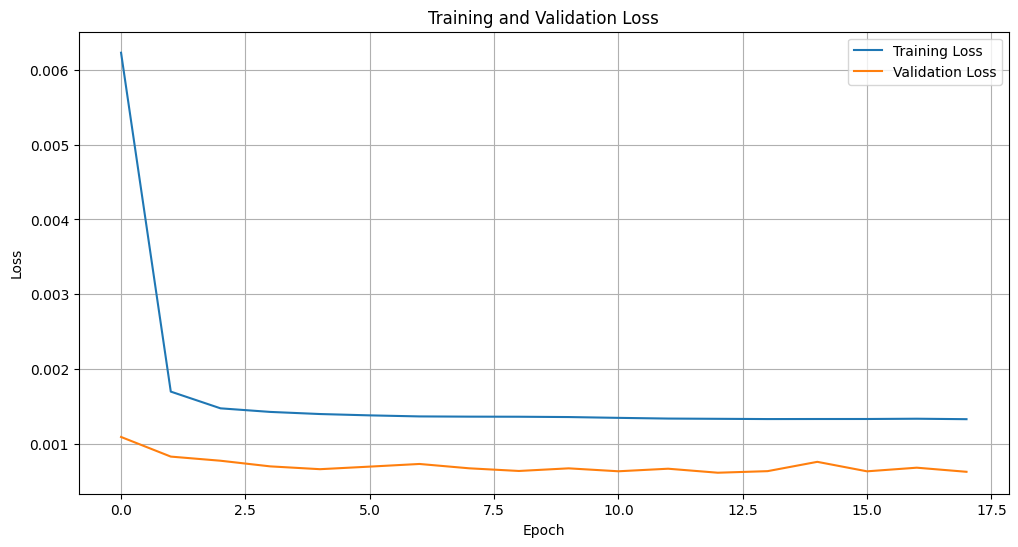

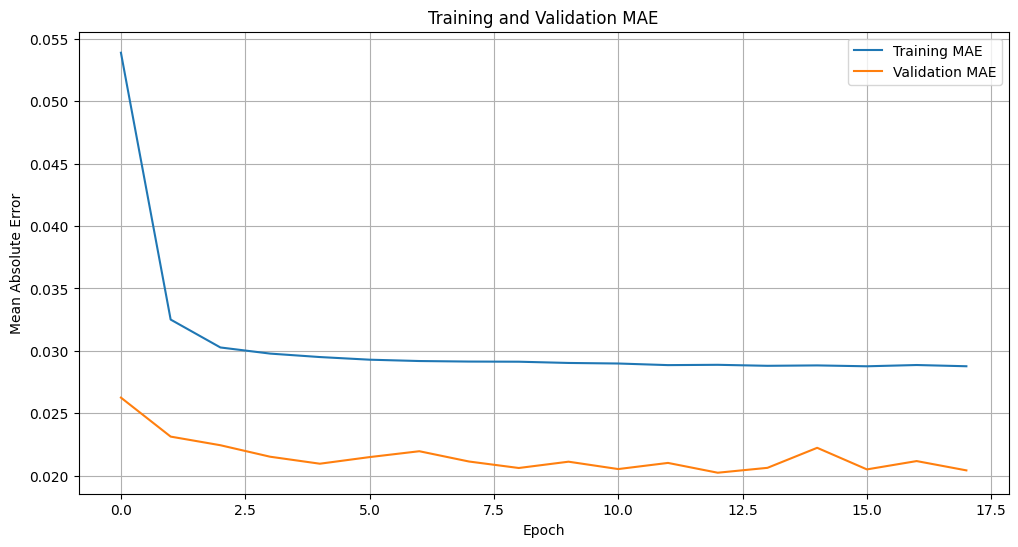

Model berhasil dilatih


In [6]:
plt.figure(figsize=(12, 6))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))

plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')

plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()

print("Model berhasil dilatih")

Evaluasi Model :

In [7]:
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 957us/step - loss: 6.1290e-04 - mae: 0.0202
Test Loss: 0.0006118661840446293, Test MAE: 0.020214758813381195


Menyimpan Model :

In [8]:
# Simpan model
model.save("../models/safe_food_model.h5")
print("Model berhasil disimpan dalam format HDF5 di: ../models/safe_food_model.h5")

model.save("../models/safe_food_model.keras", save_format="keras")
print("Model berhasil disimpan dalam format Keras di: ../models/safe_food_model.keras")

Model berhasil disimpan dalam format HDF5 di: ../models/safe_food_model.h5
Model berhasil disimpan dalam format Keras di: ../models/safe_food_model.keras


Menyimpan Model (Format TFLite) : 

In [9]:
try:
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Tambahkan optimasi jika diperlukan
    tflite_model = converter.convert()

    # Simpan model TFLite
    tflite_model_path = "../models/safe_food_model.tflite"
    with open(tflite_model_path, 'wb') as f:
        f.write(tflite_model)

    print(f"Model berhasil disimpan dalam format TFLite di: {tflite_model_path}")
except Exception as e:
    print(f"Terjadi error saat mengonversi model: {e}")


INFO:tensorflow:Assets written to: C:\Users\aryas\AppData\Local\Temp\tmp5xbvfaiz\assets


INFO:tensorflow:Assets written to: C:\Users\aryas\AppData\Local\Temp\tmp5xbvfaiz\assets


Saved artifact at 'C:\Users\aryas\AppData\Local\Temp\tmp5xbvfaiz'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2227641127680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2227641133536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2227641134944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2227641134592: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model berhasil disimpan dalam format TFLite di: ../models/safe_food_model.tflite


Menyimpan Model (Format TF.js) : 

In [ ]:
%pip install tensorflowjs

In [ ]:
%tensorflowjs_converter --input_format=keras ../models/safe_food_model.h5 ../models/tfjs_model